In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Time setup
total_years = 20
dt = 1/12 # monthly time step
time = np.arange(0, total_years, dt)
n = len(time)


# Initialize arrays

Below_Baseline_Stock = np.zeros(n)
Baseline_Stock = np.zeros(n)
Efficient_Stock = np.zeros(n)
Cumulative_adopters = np.zeros(n)


Retirement_Flow_arr = np.zeros(n)
Below_Baseline_Adoption_Flow_arr = np.zeros(n)
Baseline_Adoption_Flow_arr = np.zeros(n)
Efficient_Adoption_Flow_arr = np.zeros(n)
Total_Adoption_Flow_arr = np.zeros(n)

out_Below_Baseline_Adoption_Flow_arr = np.zeros(n)
out_Baseline_Adoption_Flow_arr = np.zeros(n)
out_Efficient_Adoption_Flow_arr = np.zeros(n)

Total_Below_Baseline_Adoption_Flow_arr = np.zeros(n)
Total_Baseline_Adoption_Flow_arr = np.zeros(n)
Total_Efficient_Adoption_Flow_arr = np.zeros(n)

bass_share_arr = np.zeros(n)
bass_value_arr = np.zeros(n)



In [71]:

""" Could do this from individual pieces to total market size or market size to individual pieces"""
m = 1000  # market size for the equipment # not used in Par
# Initial stocks
initial_below_baseline = m * 0.3  # 30% below baseline
initial_baseline = m * 0.5  # 50% baseline
initial_efficient = m* 0.2  # 20% efficient at start

retirement_rate = 0.05    # 5% of total equipment retires per year

initial_adopters = initial_efficient  # Initial adopters are those with efficient equipment
#total_stock = initial_below_baseline + initial_baseline + initial_efficient
# Set initial values

Below_Baseline_Stock[0] = initial_below_baseline
Baseline_Stock[0] = initial_baseline
Efficient_Stock[0] = initial_efficient
Cumulative_adopters[0] = initial_adopters

In [72]:
# Bass diffusion and retirement parameters
par = {
    "p": 0.05,                 # innovation coefficient
    "q": 0.5,                 # imitation coefficient
}


In [73]:
# # thsi cell is bass Defission for each iteration with total population being the retired

# def bass_diff_eq(Below_Baseline, Baseline, Efficient, Cumulative_adopters, par, m, retirement_rate):
#     p = par["p"]
#     q = par["q"]

    
#     bass_value = (p + q * (Cumulative_adopters / m)) * (m - Cumulative_adopters)
#     #Number of upgrades occurring in the current time step.
#     #if we want a discrete version
#     # innovation*(marketsize - penetration_start) + imitation*(1/marketsize)*penetration_start*(marketsize-penetration_start)
#     #bass_value = (p + q * (Cumulative_adopters / m)) * (1 - Cumulative_adopters / m)
#     bass_share = np.clip((bass_value + Cumulative_adopters)/m, 0.0, 1.0)

# # adjusting for retirement 
#     Retirement_Flow = m * retirement_rate
#     Efficient_Adoption_Flow = Retirement_Flow * bass_share #(1-bass_share)
#     Remaining_Flow = Retirement_Flow - Efficient_Adoption_Flow

#     Baseline_Adoption_Flow = Remaining_Flow
#     Below_Baseline_Adoption_Flow = 0.0
# # outflows
#     out_Efficient_Adoption_Flow = - (Efficient * retirement_rate) 
#     out_Baseline_Adoption_Flow = - (Baseline * retirement_rate)
#     out_Below_Baseline_Adoption_Flow = - (Below_Baseline * retirement_rate)
#     # Euler differentials
#     dEfficient_dt = Efficient_Adoption_Flow - (Efficient * retirement_rate)
#     dBaseline_dt = Baseline_Adoption_Flow - (Baseline * retirement_rate)
#     dBelow_Baseline_dt = Below_Baseline_Adoption_Flow - (Below_Baseline * retirement_rate)
#     dadopters_dt = Efficient_Adoption_Flow #- (Efficient * retirement_rate)

#     flows = {
#         "Retirement": Retirement_Flow,
#         "Efficient_Adoption": Efficient_Adoption_Flow,
#         "Baseline_Adoption": Baseline_Adoption_Flow,
#         "Below_Baseline_Adoption": Below_Baseline_Adoption_Flow,
#         "Total_Adoption_Flow": Retirement_Flow,

#         "out_Efficient_Adoption": out_Efficient_Adoption_Flow ,
#         "out_Baseline_Adoption": out_Baseline_Adoption_Flow,
#         "out_Below_Baseline_Adoption": out_Below_Baseline_Adoption_Flow,

#         "Total_Efficient_Adoption": dEfficient_dt ,
#         "Total_Baseline_Adoption": dBaseline_dt,
#         "Total_Below_Baseline_Adoption": dBelow_Baseline_dt,

#         "bass_value": bass_value,
#         "bass_share": bass_share,
#         "Cumulative_adopters": Cumulative_adopters
#     }

#     return dBelow_Baseline_dt, dBaseline_dt, dEfficient_dt, dadopters_dt, flows



In [ ]:
# thsi cell is bass Defission for each iteration with total population being the retired

def bass_diff_eq(Below_Baseline, Baseline, Efficient, Cumulative_adopters, par, m, retirement_rate):
    p = par["p"]
    q = par["q"]

    
    bass_value = (p + q * (Cumulative_adopters / m)) * (m - Cumulative_adopters)
    #Number of upgrades occurring in the current time step.
    #note the bass value is in some cases larger than the retirement flow (based on current p and q which are aggressive))
    bass_share = np.clip((bass_value + Cumulative_adopters)/m, 0.0, 1.0)

# inflows 
    Retirement_Flow = m * retirement_rate
    Efficient_Adoption_Flow = Retirement_Flow * bass_share 
    Remaining_Flow = Retirement_Flow - Efficient_Adoption_Flow
    #? what happens when we have multiple efficient technologies
    Baseline_Adoption_Flow = Remaining_Flow
    Below_Baseline_Adoption_Flow = 0.0

# outflows
    out_Efficient_Adoption_Flow = - (Efficient * retirement_rate) 
    out_Baseline_Adoption_Flow = - (Baseline * retirement_rate)
    out_Below_Baseline_Adoption_Flow = - (Below_Baseline * retirement_rate)

    # Euler differentials
    dEfficient_dt = Efficient_Adoption_Flow - (Efficient * retirement_rate)
    dBaseline_dt = Baseline_Adoption_Flow - (Baseline * retirement_rate)
    dBelow_Baseline_dt = Below_Baseline_Adoption_Flow - (Below_Baseline * retirement_rate)
    dadopters_dt = Efficient_Adoption_Flow - (Efficient * retirement_rate) #this value is added to our cumulative_adopters input for the bass diffusion curve
    
    #do we ignore the removed numbers when updating the cumulative adopted? #if we ignore than get more aggressive curves

    flows = {
        "Retirement": Retirement_Flow,
        "Efficient_Adoption": Efficient_Adoption_Flow,
        "Baseline_Adoption": Baseline_Adoption_Flow,
        "Below_Baseline_Adoption": Below_Baseline_Adoption_Flow,
        "Total_Adoption_Flow": Retirement_Flow,

        "out_Efficient_Adoption": out_Efficient_Adoption_Flow ,
        "out_Baseline_Adoption": out_Baseline_Adoption_Flow,
        "out_Below_Baseline_Adoption": out_Below_Baseline_Adoption_Flow,
        
        "Total_Efficient_Adoption": dEfficient_dt ,
        "Total_Baseline_Adoption": dBaseline_dt,
        "Total_Below_Baseline_Adoption": dBelow_Baseline_dt,

        "bass_value": bass_value,
        "bass_share": bass_share,
        "Cumulative_adopters": Cumulative_adopters
    }

    return dBelow_Baseline_dt, dBaseline_dt, dEfficient_dt, dadopters_dt, flows



In [75]:
for t in range(1, n):
    dBelow_Baseline_dt, dBaseline_dt, dEfficient_dt, dadopters_dt,  flows = bass_diff_eq(
        Below_Baseline_Stock[t-1],
        Baseline_Stock[t-1],
        Efficient_Stock[t-1],
        Cumulative_adopters[t-1],
        par,
        m, 
        retirement_rate
    )

    # Euler integration
    Below_Baseline_Stock[t] = Below_Baseline_Stock[t-1] + dBelow_Baseline_dt * dt
    Baseline_Stock[t] = Baseline_Stock[t-1] + dBaseline_dt * dt
    Efficient_Stock[t] = Efficient_Stock[t-1] + dEfficient_dt * dt
    Cumulative_adopters[t] = Cumulative_adopters[t-1] + dadopters_dt * dt

#enforce non-negitivity
    Below_Baseline_Stock[t] = max(Below_Baseline_Stock[t], 0.0)
    Baseline_Stock[t]       = max(Baseline_Stock[t], 0.0)
    Efficient_Stock[t]      = max(Efficient_Stock[t], 0.0)
    Cumulative_adopters[t]  = max(Cumulative_adopters[t], 0.0)

    # Log flows
    Retirement_Flow_arr[t] = flows["Retirement"]
    Efficient_Adoption_Flow_arr[t] = flows["Efficient_Adoption"]
    Baseline_Adoption_Flow_arr[t] = flows["Baseline_Adoption"]
    Below_Baseline_Adoption_Flow_arr[t] = flows["Below_Baseline_Adoption"]
    Total_Adoption_Flow_arr[t] = flows["Total_Adoption_Flow"]

    out_Efficient_Adoption_Flow_arr[t] = flows["out_Efficient_Adoption"]
    out_Baseline_Adoption_Flow_arr[t] = flows["out_Baseline_Adoption"]
    out_Below_Baseline_Adoption_Flow_arr[t] = flows["out_Below_Baseline_Adoption"]

    Total_Efficient_Adoption_Flow_arr[t] = flows["Total_Efficient_Adoption"]
    Total_Baseline_Adoption_Flow_arr[t] = flows["Total_Baseline_Adoption"]
    Total_Below_Baseline_Adoption_Flow_arr[t] = flows["Total_Below_Baseline_Adoption"]

    bass_share_arr[t] = flows["bass_share"]
    bass_value_arr[t] = flows["bass_value"]
    #Cumulative_adopters[t] = flows["Cumulative_adopters"]

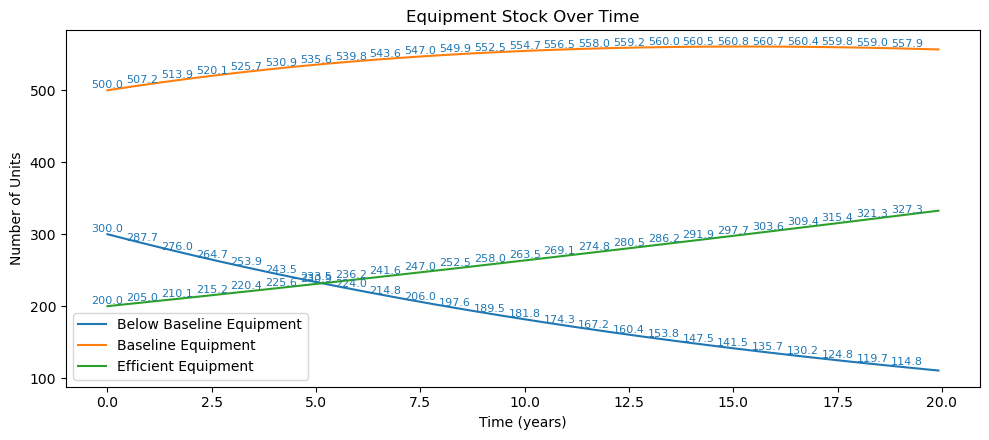

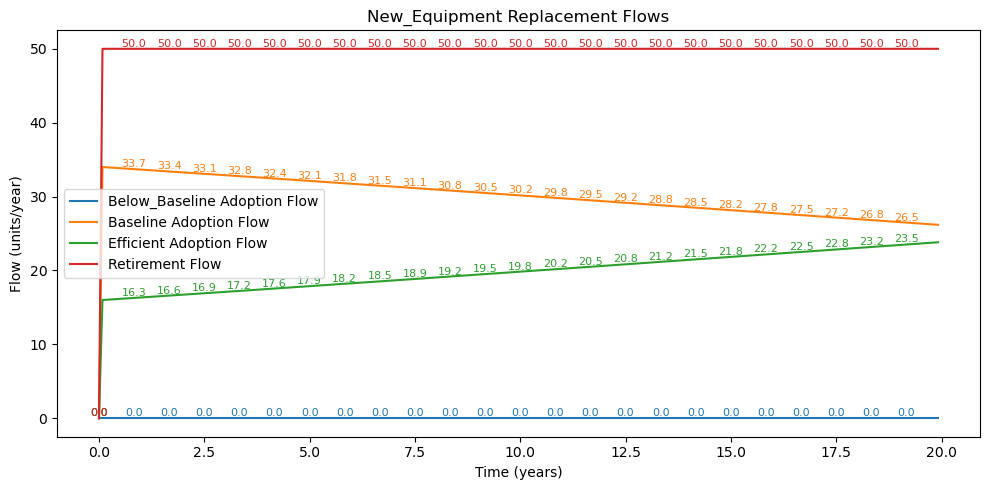

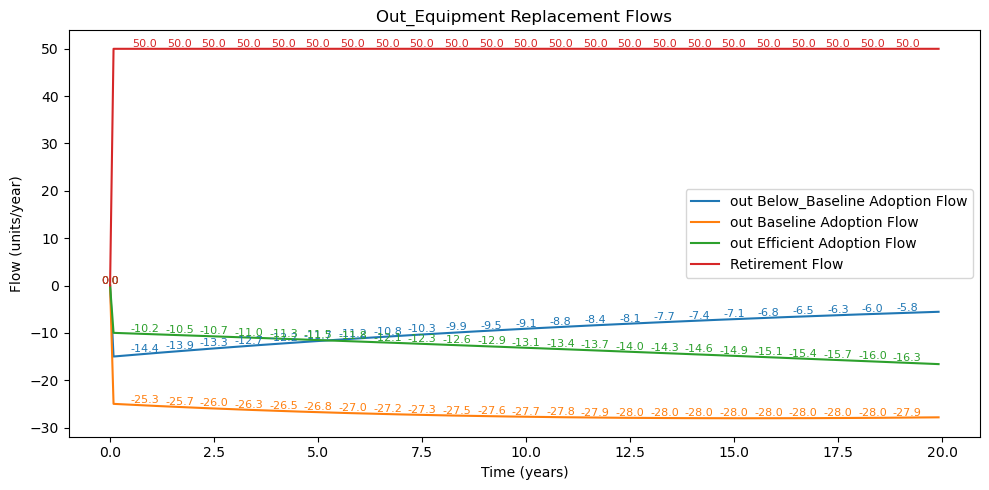

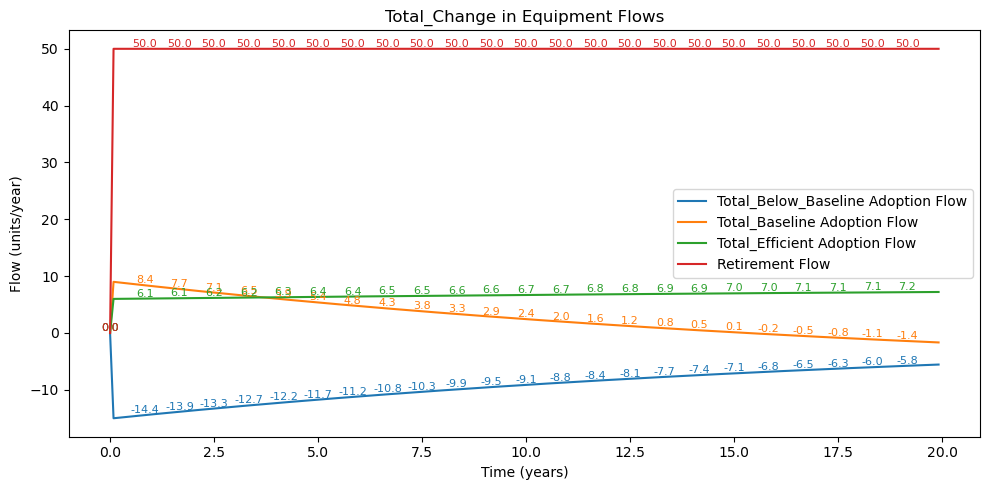

In [76]:
# Equipment Stocks
plt.figure(figsize=(10, 4.5))
plt.plot(time, Below_Baseline_Stock, label="Below Baseline Equipment")
plt.plot(time, Baseline_Stock, label="Baseline Equipment")
plt.plot(time, Efficient_Stock, label="Efficient Equipment")
for i in range(0, len(time), 10):
    plt.text(time[i], Efficient_Stock[i], f"{Efficient_Stock[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], Baseline_Stock[i], f"{Baseline_Stock[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], Below_Baseline_Stock[i], f"{Below_Baseline_Stock[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:blue')
plt.xlabel("Time (years)")
plt.ylabel("Number of Units")
plt.title("Equipment Stock Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# New Equipment Flows
plt.figure(figsize=(10, 5))
plt.plot(time, Below_Baseline_Adoption_Flow_arr, label="Below_Baseline Adoption Flow")
plt.plot(time, Baseline_Adoption_Flow_arr, label="Baseline Adoption Flow")
plt.plot(time, Efficient_Adoption_Flow_arr, label="Efficient Adoption Flow")
plt.plot(time, Retirement_Flow_arr, label="Retirement Flow")

for i in range(0, len(time), 10):
    plt.text(time[i], Below_Baseline_Adoption_Flow_arr[i], f"{Below_Baseline_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], Baseline_Adoption_Flow_arr[i], f"{Baseline_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], Efficient_Adoption_Flow_arr[i], f"{Efficient_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], Retirement_Flow_arr[i], f"{Retirement_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:red')

plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("New_Equipment Replacement Flows")
plt.legend()
plt.tight_layout()
plt.show()

# out Equipment Flows
plt.figure(figsize=(10, 5))
plt.plot(time, out_Below_Baseline_Adoption_Flow_arr, label="out Below_Baseline Adoption Flow")
plt.plot(time, out_Baseline_Adoption_Flow_arr, label="out Baseline Adoption Flow")
plt.plot(time, out_Efficient_Adoption_Flow_arr, label="out Efficient Adoption Flow")
plt.plot(time, Retirement_Flow_arr, label="Retirement Flow")

for i in range(0, len(time), 10):
    plt.text(time[i], out_Below_Baseline_Adoption_Flow_arr[i], f"{out_Below_Baseline_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], out_Baseline_Adoption_Flow_arr[i], f"{out_Baseline_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], out_Efficient_Adoption_Flow_arr[i], f"{out_Efficient_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], Retirement_Flow_arr[i], f"{Retirement_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:red')

plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Out_Equipment Replacement Flows")
plt.legend()
plt.tight_layout()
plt.show()

# Total Equipment Flows
plt.figure(figsize=(10, 5))
plt.plot(time, Total_Below_Baseline_Adoption_Flow_arr, label="Total_Below_Baseline Adoption Flow")
plt.plot(time, Total_Baseline_Adoption_Flow_arr, label="Total_Baseline Adoption Flow")
plt.plot(time, Total_Efficient_Adoption_Flow_arr, label="Total_Efficient Adoption Flow")
plt.plot(time, Retirement_Flow_arr, label="Retirement Flow")

for i in range(0, len(time), 10):
    plt.text(time[i], Total_Below_Baseline_Adoption_Flow_arr[i], f"{Total_Below_Baseline_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], Total_Baseline_Adoption_Flow_arr[i], f"{Total_Baseline_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], Total_Efficient_Adoption_Flow_arr[i], f"{Total_Efficient_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], Retirement_Flow_arr[i], f"{Retirement_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom', color='tab:red')

plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Total_Change in Equipment Flows")
plt.legend()
plt.tight_layout()
plt.show()



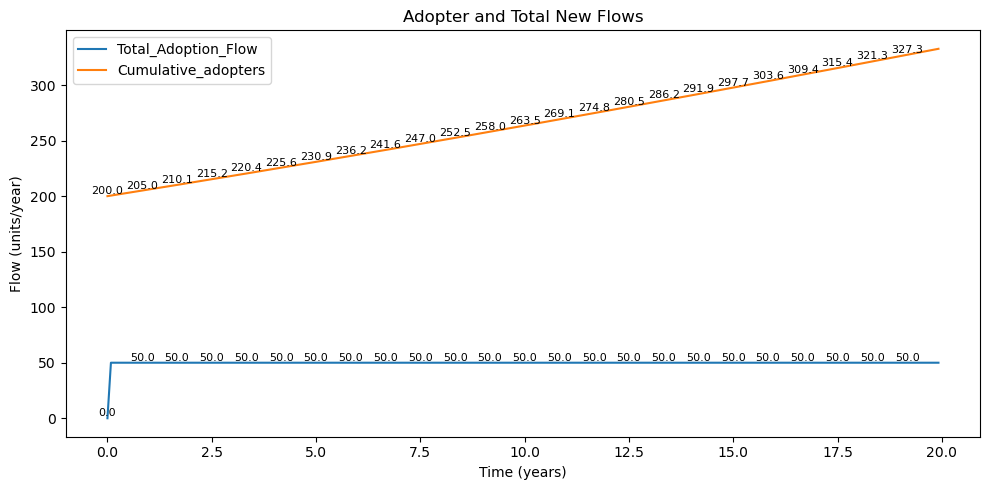

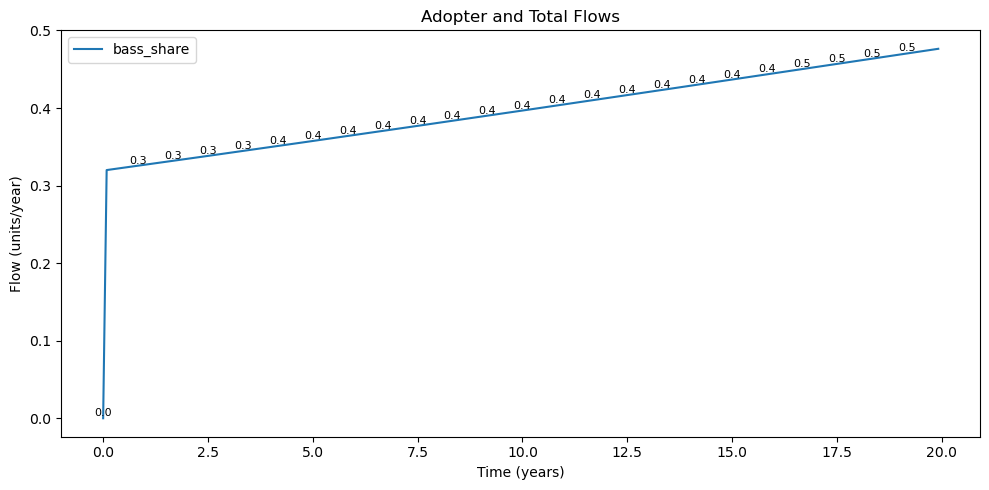

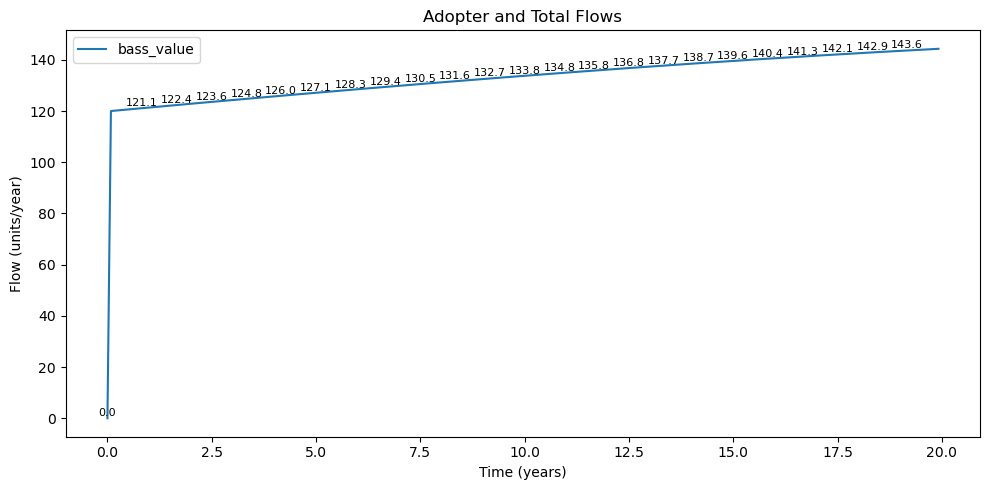

In [77]:
#Adopters
plt.figure(figsize=(10, 5))
plt.plot(time, Total_Adoption_Flow_arr, label="Total_Adoption_Flow")
# Add Y-value labels every 10th point
for i in range(0, len(time), 10):
    plt.text(time[i], Total_Adoption_Flow_arr[i], f"{Total_Adoption_Flow_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom')
plt.plot(time, Cumulative_adopters, label="Cumulative_adopters")
# Add Y-value labels every 10th point
for i in range(0, len(time), 10):
    plt.text(time[i], Cumulative_adopters[i], f"{Cumulative_adopters[i]:.1f}", 
             fontsize=8, ha='center', va='bottom')
plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Adopter and Total New Flows")
plt.legend()
plt.tight_layout()
plt.show()


#Bass Flow
# Adopters
plt.figure(figsize=(10, 5))
plt.plot(time, bass_share_arr, label="bass_share")

# Add Y-value labels every 10th point
for i in range(0, len(time), 10):
    plt.text(time[i], bass_share_arr[i], f"{bass_share_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom')
plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Adopter and Total Flows")
plt.legend()
plt.tight_layout()
plt.show()

#Bass values
# Adopters
plt.figure(figsize=(10, 5))
plt.plot(time, bass_value_arr, label="bass_value")

# Add Y-value labels every 10th point
for i in range(0, len(time), 10):
    plt.text(time[i], bass_value_arr[i], f"{bass_value_arr[i]:.1f}", 
             fontsize=8, ha='center', va='bottom')
plt.xlabel("Time (years)")
plt.ylabel("Flow (units/year)")
plt.title("Adopter and Total Flows")
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
Cumulative_adopters

array([200.        , 200.5       , 201.00052031, 201.50156044,
       202.00311986, 202.50519809, 203.00779459, 203.51090887,
       204.01454038, 204.51868862, 205.02335305, 205.52853314,
       206.03422835, 206.54043814, 207.04716198, 207.55439931,
       208.06214958, 208.57041224, 209.07918673, 209.58847249,
       210.09826894, 210.60857552, 211.11939166, 211.63071677,
       212.14255028, 212.6548916 , 213.16774014, 213.68109531,
       214.19495651, 214.70932314, 215.22419459, 215.73957026,
       216.25544953, 216.77183179, 217.28871642, 217.80610279,
       218.32399028, 218.84237825, 219.36126607, 219.8806531 ,
       220.4005387 , 220.92092222, 221.441803  , 221.9631804 ,
       222.48505375, 223.00742239, 223.53028566, 224.05364289,
       224.5774934 , 225.10183651, 225.62667154, 226.15199781,
       226.67781463, 227.2041213 , 227.73091712, 228.2582014 ,
       228.78597343, 229.31423251, 229.84297791, 230.37220892,
       230.90192482, 231.43212489, 231.9628084 , 232.49

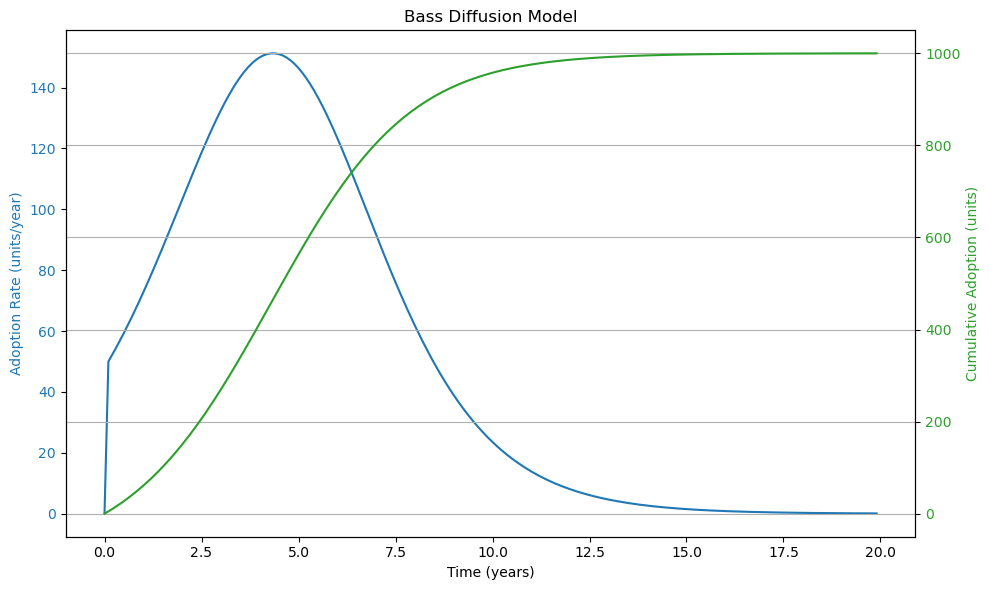

In [79]:
def bass_diffusion_curve(p, q, m, t_max=20, dt=0.1):
    """
    Plots Bass diffusion adoption rate and cumulative adoption over time.

    Parameters:
    p     : innovation coefficient
    q     : imitation coefficient
    m     : total market size
    t_max : simulation duration (years)
    dt    : time step (years)
    """
    time = np.arange(0, t_max, dt)
    A = np.zeros_like(time)  # cumulative adopters
    dA_dt = np.zeros_like(time)  # adoption rate

    for t in range(1, len(time)):
        A_prev = A[t-1]
        dA = (p + q * (A_prev / m)) * (m - A_prev)
        #at every point he adoption curve is above the 50 retired units 
        A[t] = A_prev + dA * dt
        #for chart
        dA_dt[t] = dA

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(time, dA_dt, label="Adoption Rate", color='tab:blue')
    ax1.set_xlabel("Time (years)")
    ax1.set_ylabel("Adoption Rate (units/year)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(time, A, label="Cumulative Adoption", color='tab:green')
    ax2.set_ylabel("Cumulative Adoption (units)", color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title("Bass Diffusion Model")
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# usage
bass_diffusion_curve(p=par["p"], q=par["q"], m=1000)
